In [1]:
'''Paper Trading script, uses alphavantage API to paper trade a specified stock using SMA strategy'''
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import matplotlib.pyplot as plt
API_TOKEN = 'FL3XVWNCPFOKRTOJ'
#Change the stock code according to NASDAQ to change to different stocks
stock = "AAPL"
API_BASE = f'https://www.alphavantage.co/query?'
SMA60dic = requests.get(f"https://www.alphavantage.co/query?function=SMA&symbol={stock}&interval=5min&time_period=60&series_type=open&apikey={API_TOKEN}").json()
SMA200dic = requests.get(f"https://www.alphavantage.co/query?function=SMA&symbol={stock}&interval=5min&time_period=200&series_type=open&apikey={API_TOKEN}").json()
pricedic = requests.get(f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={stock}&interval=5min&outputsize=full&apikey={API_TOKEN}").json()
RSIdic = requests.get(f"https://www.alphavantage.co/query?function=RSI&symbol={stock}&interval=5min&time_period=14&series_type=open&apikey={API_TOKEN}").json()

#Building the Data
This block prepares the data in a panda dataframe and displays how the strategy works using graphs.

##Simple Moving Average Trading Strategy
> Buy and Sell signals are generated when the SMA 60 and SMA 200 cross over each other.

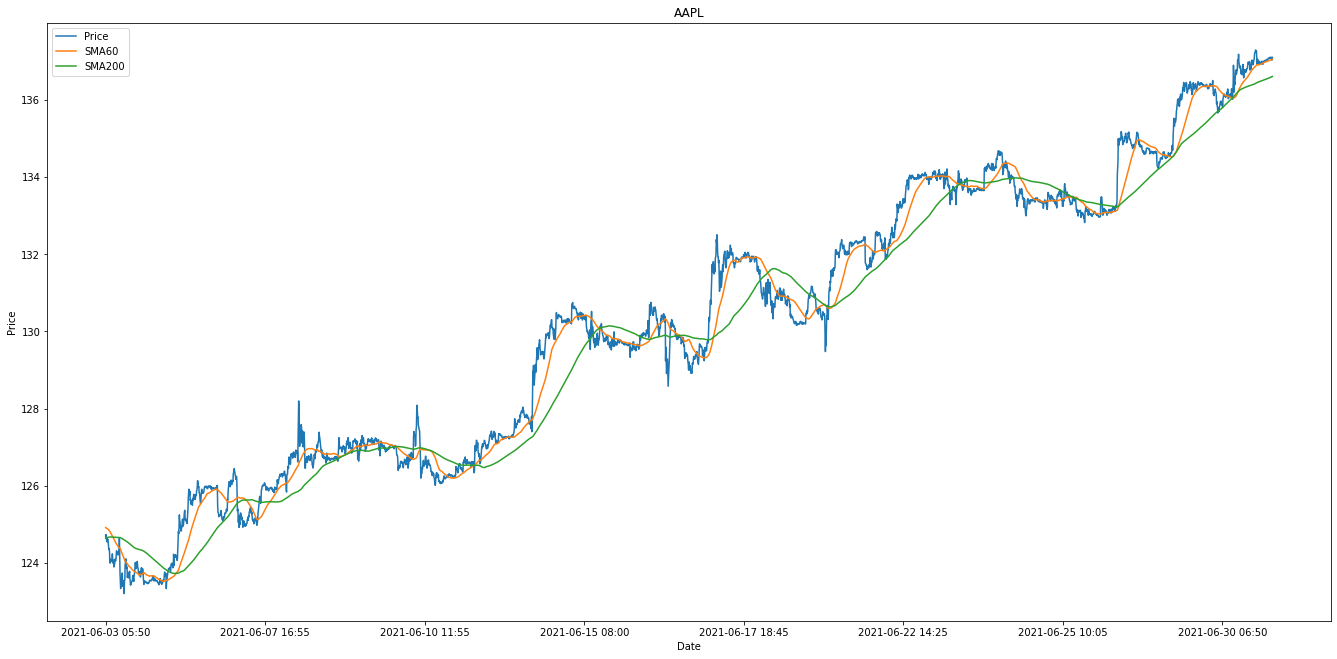

In [4]:
""" This is the block whch builds your panda dataframe which can be reused for further data analysis later"""
ls60 = []
ls200 = []
date = []
price = []
RSI = []
#Builds the panda data frame using the given lists
def BuildPanda():
  df = pd.DataFrame(list(zip(date,price,ls60,ls200,RSI))) 
  df.columns = ["Date","Price","SMA60","SMA200","RSI"]


#Builds lists from apha vantage API
def BuildLists():
  for i in SMA200dic["Technical Analysis: SMA"].items():
    
    date.append(i[0])
    ls200.append(float(i[1]["SMA"]))

  for i in date:
    ls60.append(float(SMA60dic["Technical Analysis: SMA"][i]["SMA"]))
    price.append(float(pricedic["Time Series (5min)"][i+":00"]["4. close"]))
    RSI.append(float(RSIdic["Technical Analysis: RSI"][i]["RSI"]))

  for i in SMA200dic["Technical Analysis: SMA"].items():
    
    date.append(datetime.strptime(i[0],'%Y-%m-%d %H:%M'))
  


#Shows you the inter relation between technical indicators using the graph
def StockGraph():
  size = 0
  
  reversed_df = df.iloc[::-1]
  ax = reversed_df.iloc[size:].plot(x = "Date", y = "Price",figsize=(23, 11))
  reversed_df.iloc[size:].plot(x = "Date", y = "SMA60",ax = ax)
  reversed_df.iloc[size:].plot(x = "Date", y = "SMA200",ax = ax)
  # reversed_df.iloc[size:].plot(x = "Date", y = "RSI",ax = ax)

  plt.legend()
  plt.title(stock)
  plt.ylabel("Price")
  plt.show()





BuildLists()
BuildPanda()
StockGraph()



#Trading Begins Here!
Give the money variable some paper currency using the money variable (all amounts in dollars).
Running the block gives you the profit or loss made from the script.

In [3]:
#Change money variable to change the paper money you give to the script
money = 10000
mode = 1
action = []
profit = 0

holding = 0

def buysellSMA():
  global mode
  global money
  global holding
  global profit
  
  for i in range(len(df.index)-1,-1,-1):
    if df["SMA60"][i] >= df["SMA200"][i]:
      if mode == 1:
        
        action.append("Buy")
        
        
        holding += money//df["Price"][i]
        money -= holding*df["Price"][i]
        
        
        mode = 0
      else:
        action.append("NA")
    else:
      if mode == 0:
        
        action.append("Sell")
        
      
        
        
        money += holding*df["Price"][i]
        holding -= money//df["Price"][i]
        
        mode = 1
      else:
        action.append("NA")
  
  profit = (money - 10000) + holding*df["Price"][0]
buysellSMA()
action.reverse()
df["Action"] = action
print("Profit is: ", profit)

df
        
    

  

Profit is:  432.252800000002


,Date,Price,SMA60,SMA200,RSI,Action
0,2021-06-30 20:00,137.10,137.0473,136.6052,48.2203,NA
1,2021-06-30 19:55,137.03,137.0449,136.6015,48.8627,NA
2,2021-06-30 19:50,137.08,137.0435,136.5976,52.0843,NA
3,2021-06-30 19:45,137.04,137.0427,136.5937,59.3515,NA
4,2021-06-30 19:40,137.10,137.0404,136.5897,55.9253,NA
...,...,...,...,...,...,...
3653,2021-06-03 06:10,124.55,124.8990,124.6595,35.8187,NA
3654,2021-06-03 06:05,124.66,124.9053,124.6577,39.5754,NA
3655,2021-06-03 06:00,124.62,124.9103,124.6556,35.3798,NA
3656,2021-06-03 05:55,124.74,124.9162,124.6535,41.3832,NA


#Experimental Phase (Under construction in another project)
From this part on, I try to extend my trading strategy from Simple Moving Averages to more complex technical indicators.

The work for this part has now been  shifted to a new project I am developing, where I am trying to find a profitable combination of technical indicators using neural networks.

In [ ]:

ADX = pass
MACD = pass
STOCH = pass

weights = {
    "RSI":20,
    "ADX":20,
    "MACD":50,
    "STOCH":10
}
def RSIfun(i):
  return weights["RSI"]*df["RSI"][i]
  




def buysell():
  for i in range(len(df.index)-1,-1,-1):
    signal = 0
    signal += RSIfun(i)

    



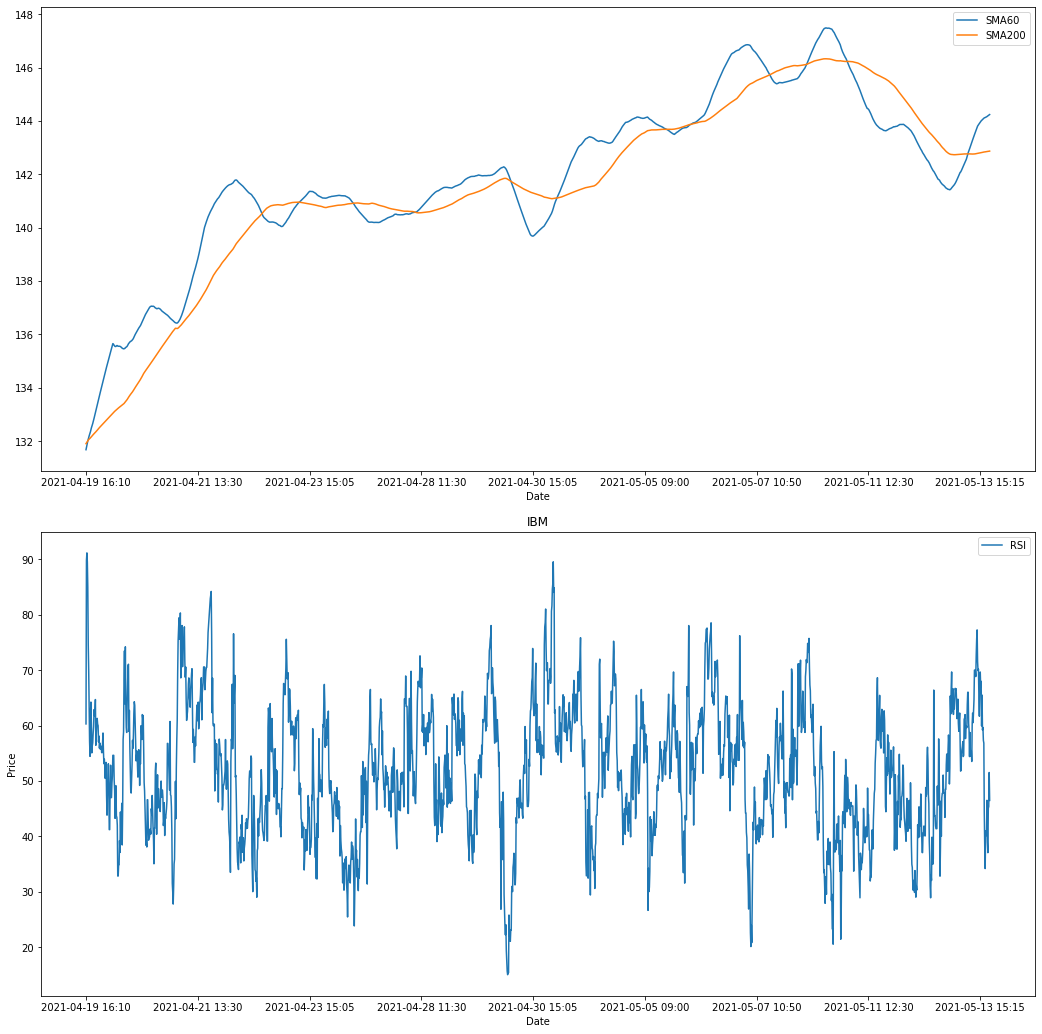

In [ ]:

ls60 = []
ls200 = []
date = []
price = []
RSI = []

# print(pricedic)
# print(RSIdic)
def BuildPanda():
  for i in SMA200dic["Technical Analysis: SMA"].items():
    
    date.append(i[0])
    ls200.append(float(i[1]["SMA"]))

  for i in date:
    ls60.append(float(SMA60dic["Technical Analysis: SMA"][i]["SMA"]))
    price.append(float(pricedic["Time Series (5min)"][i+":00"]["4. close"]))
    RSI.append(float(RSIdic["Technical Analysis: RSI"][i]["RSI"]))

  for i in SMA200dic["Technical Analysis: SMA"].items():
    
    date.append(datetime.strptime(i[0],'%Y-%m-%d %H:%M'))

def StockGraph():
  size = 0
  
  reversed_df = df.iloc[::-1]
  # ax = reversed_df.iloc[size:].plot(x = "Date", y = "Price",figsize=(23, 11))
  # reversed_df.iloc[size:].plot(x = "Date", y = "SMA60",ax = ax)
  # reversed_df.iloc[size:].plot(x = "Date", y = "SMA200",ax = ax)
  # reversed_df.iloc[size:].plot(x = "Date", y = "RSI",ax = ax)
  df1  = reversed_df.drop(['Price', 'RSI'], axis=1)
  df2 = reversed_df.drop(['Price', 'SMA60', 'SMA200'], axis=1)
  figure, axes = plt.subplots(2, 1, figsize=(15,15))
  df1.plot(x = "Date", ax=axes[0])
  df2.plot(x = "Date", ax=axes[1])
  figure.tight_layout(pad=3.0)
  plt.legend()
  plt.title(stock)
  plt.ylabel("Price")
  plt.show()

BuildPanda()

df = pd.DataFrame(list(zip(date,price,ls60,ls200,RSI))) 
df.columns = ["Date","Price","SMA60","SMA200","RSI"]



StockGraph()
# df

